In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess as ls

In [2]:
def getWeek(data):
    day = dt.date.weekday(data[1])
    yr = data[1].year
    wk = dt.date.isocalendar(data[1])[1]

    # 0 is weekend, 1 is weekday

    if (day == 5 or day == 6):
         data[10] = 0
         data[11] = wk + ( abs(2006 - yr) * 52)
    elif (day != 5 and day != 6):
         data[10] = 1
         data[11] = wk + ( abs(2006 - yr) * 52)
    else:
         data[10] = -1
         data[11] = -1
    return data

In [3]:
def conDates(data):
    try:
        data[1] = pd.datetime.strptime(data[1], '%d/%m/%Y %H:%M:%S') 
    except ValueError:
        data[1] = pd.datetime.strptime(data[1], '%d/%m/%Y %H:%M')
    return data
    

In [4]:
#parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y %H:%M')

In [5]:
data = pd.read_csv("test_v1.csv", nrows=50000)

In [6]:
data = data.apply(conDates, axis=1)

In [7]:
arr = np.arange(0,10080)

In [8]:
data['day_type'] = pd.DataFrame({'day_type' : np.zeros(data.size)})
data['week'] = pd.DataFrame({'week' : np.zeros(data.size)})

data = data.sort_values(['DateTime'])

data2 = data.apply(getWeek, axis=1)
arr = np.arange(0,10080)


In [9]:
def plotWeekLoess(data):
    plt.figure(figsize=(20,10))
    for i in range(124,125):
        temp = data2.loc[data2['week'] == i]
        smooth = ls(temp['Global_active_power'], temp.index, frac=0.02)
        #p = plt.plot(arr, temp['Global_active_power'], '.')
        p = plt.plot(smooth[:,1], '-')

    return p

In [10]:
def plotWeek(data):
    plt.figure(figsize=(20,10))
    for i in range(125,126):
        temp = data2.loc[data2['week'] == i]
        smooth = ls(temp['Global_active_power'], arr, frac=0.003)
        #p = plt.plot(arr, temp['Global_active_power'], '.')
        p = plt.plot(smooth[:,1], '-', linewidth=2)

    return p


In [11]:
p = plotWeek(data2)

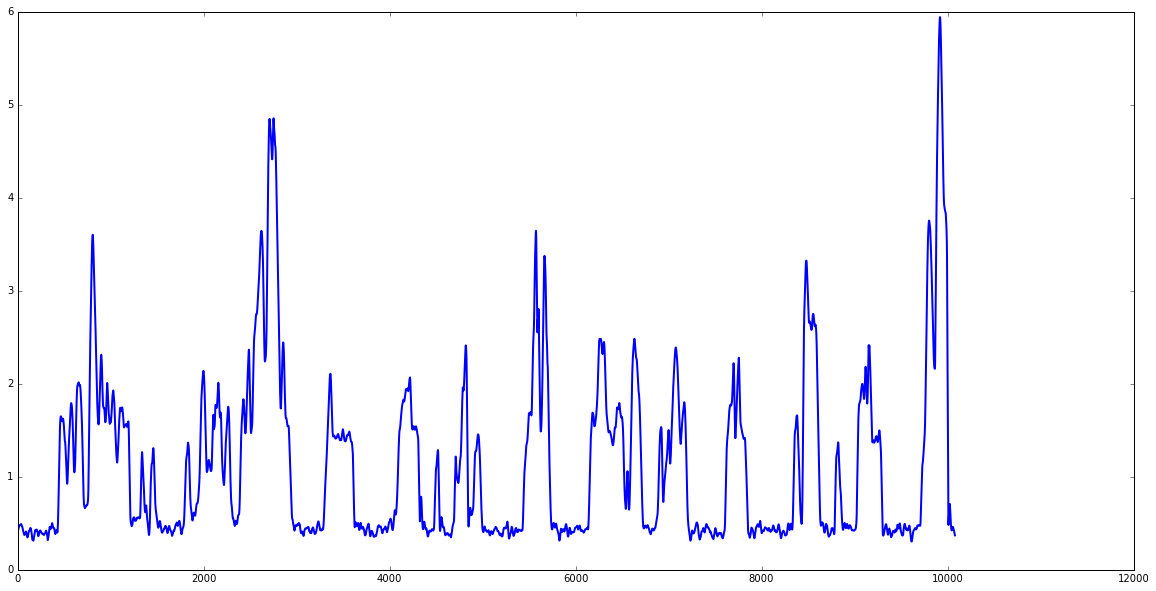

In [12]:
plt.show()
#plt.savefig('loess1.svg')
